# This notebook is to perform the Exploratory Data Analysis.

First we have to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we have to read the dataset and print it to have an overall view of it.

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Let us see the data type of each column in the dataset.

In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Next let us see the number of null values in each column.

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values in the columns with data type have been filled with just "?".

Rows with such entries could be removed.

In [5]:
df[df=='?'] = np.nan
df = df.dropna(axis=0)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


It could be seen that the number of rows drops from 32561 to 30162.

Next let us see the possible values of the categorical columns.

In [6]:
from collections import Counter

workclass_vals = dict(Counter(df['workclass'])).keys()
nationality_vals = dict(Counter(df['native.country'])).keys()
education_vals = dict(Counter(df['education'])).keys()
maritial_status_vals = dict(Counter(df['marital.status'])).keys()
occupation_vals = dict(Counter(df['occupation'])).keys()
relationship_vals = dict(Counter(df['relationship'])).keys()
race_vals = dict(Counter(df['race'])).keys()
sex_vals = dict(Counter(df['sex'])).keys()

print("Workclass: ", list(workclass_vals), '\n')
print("Nationality: ", list(nationality_vals), '\n')
print("Education levels: ", list(education_vals), '\n')
print("Maritial Status: ", list(maritial_status_vals), '\n')
print("Occupation: ", list(occupation_vals), '\n')
print("Relationship: ", list(relationship_vals), '\n')
print("Race: ", list(race_vals), '\n')
print("Sex: ", list(sex_vals), '\n')

Workclass:  ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay'] 

Nationality:  ['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'] 

Education levels:  ['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc', '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'] 

Maritial Status:  ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] 

Occupation:  ['Exec-

([<matplotlib.patches.Wedge at 0x1ad7fc62f90>,
 [Text(0.09958027680817719, -1.0954833492439795, '<=50K'),
  Text(-0.09958032809145312, 1.0954833445822894, '>50K')],
 [Text(0.054316514622642094, -0.5975363723148979, '75.1%'),
  Text(-0.05431654259533806, 0.5975363697721577, '24.9%')])

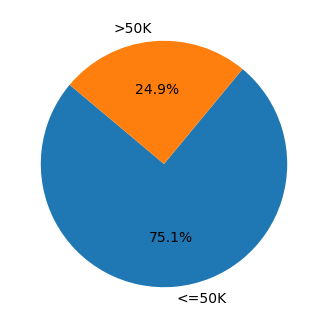

In [7]:
income_counts = df['income'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)

This displays an imbalance in the dataset as there is 75.1% occurence of one category while the other category has an occurence of only 24.9%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Transport-moving'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Craft-repair'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Protective-serv'),
  Text(11, 0, 'Handlers-cleaners'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

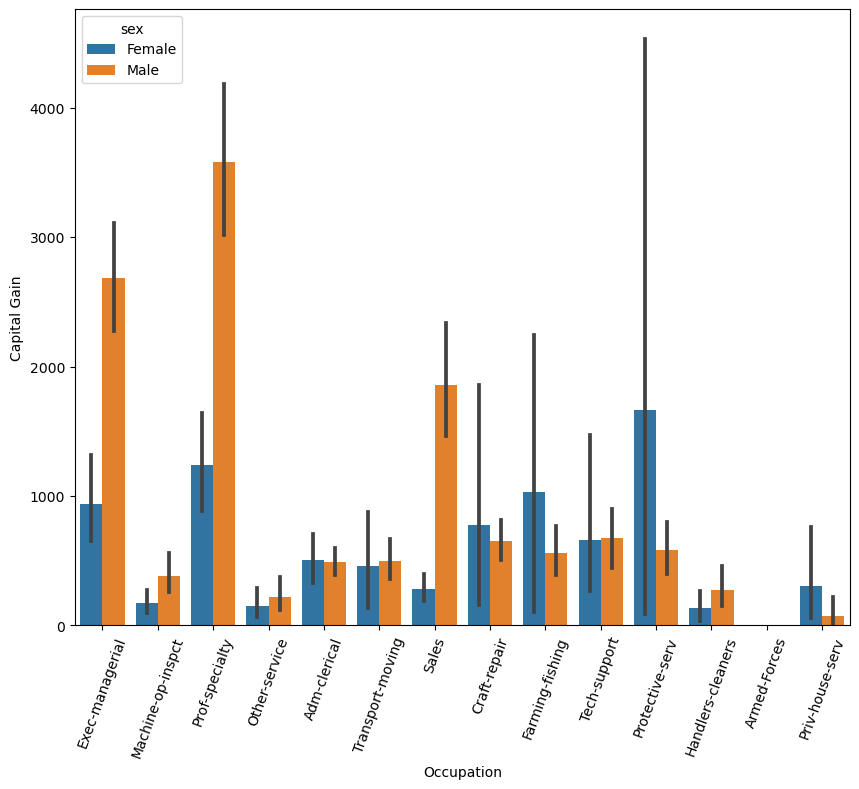

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x="occupation", y="capital.gain", data=df, hue="sex")
plt.xlabel("Occupation")
plt.ylabel("Capital Gain")
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, '7th-8th'),
  Text(2, 0, 'Some-college'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, '1st-4th'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Assoc-acdm'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

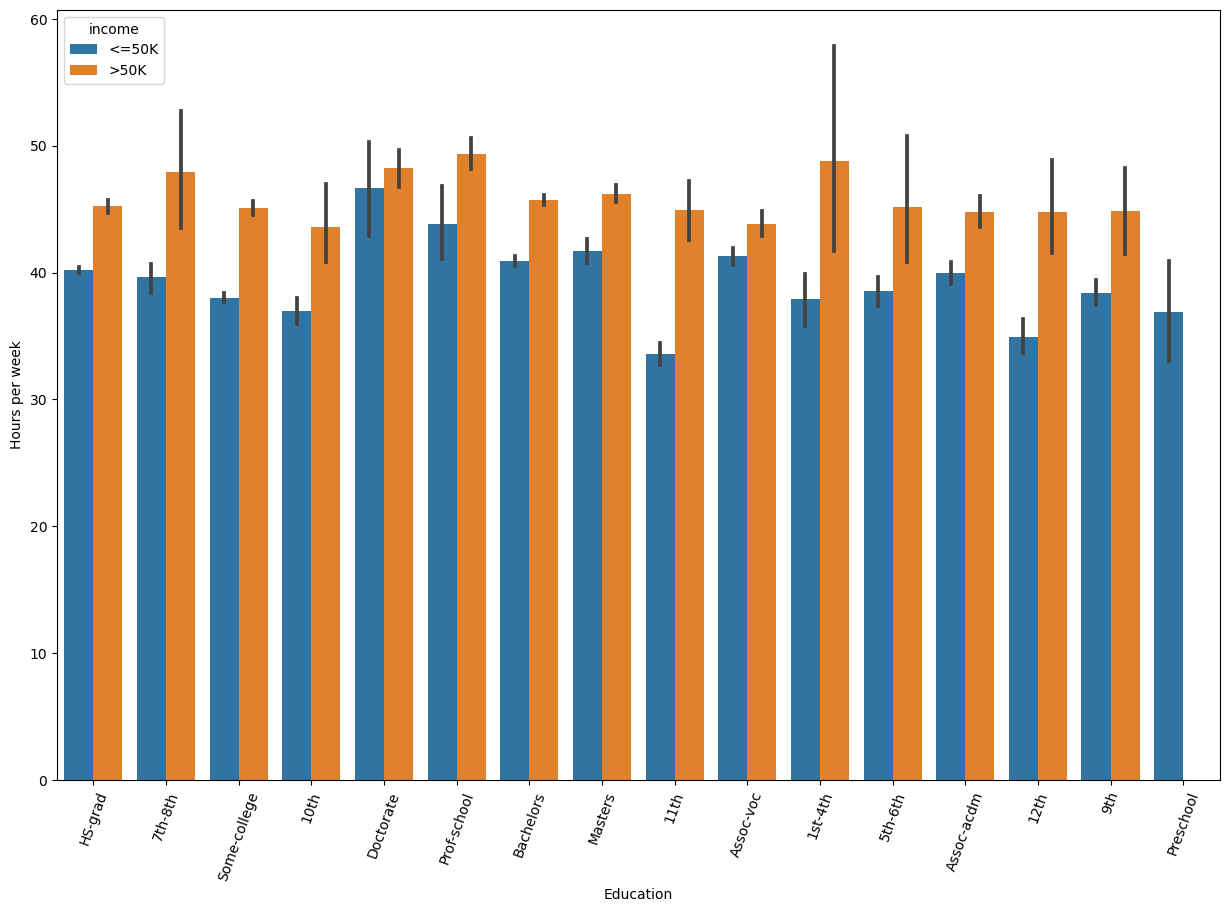

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x="education", y="hours.per.week", data=df, hue="income")
plt.xlabel("Education")
plt.ylabel("Hours per week")
plt.xticks(rotation=70)